In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from  sklearn.datasets import load_diabetes

In [3]:
data=load_diabetes(as_frame=True)

In [5]:
df=data.frame

In [6]:
df=df.drop(columns=['s1','s2','s3','s4','s5','s6'])

In [7]:
from sklearn.model_selection import train_test_split
df.columns

Index(['age', 'sex', 'bmi', 'bp', 'target'], dtype='object')

In [8]:
x=df.iloc[:,0:4]
y=df.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
x.shape

(442, 4)

In [10]:
y.shape

(442,)

In [11]:
x_test.shape

(89, 4)

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

In [34]:
gbr=GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=8,
    random_state=42
)

In [35]:
model=gbr.fit(x_train,y_train)

In [36]:
gbr_result=model.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test,gbr_result)
r2  = r2_score(y_test, gbr_result)

print("MSE:", mse)

print("R² :", r2)


MSE: 4838.754264701169
R² : 0.08670900827709527


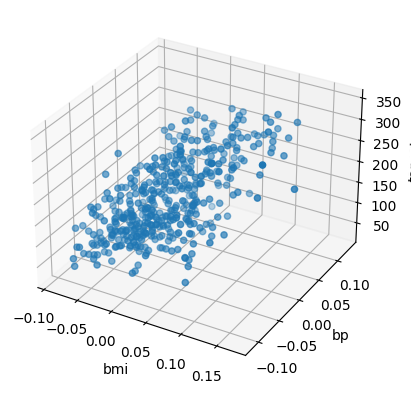

In [40]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['bmi'], df['bp'], df['target'])
ax.set_xlabel('bmi')
ax.set_ylabel('bp')
ax.set_zlabel('target')
plt.show()
